# Albeno effekt
---


#### Kode 1


Denne koden henter ut albedo effekten i alpene fra 2004 til 2024 hvor feil marginen er lav fra data_m-lavfeilmargin (oppgave 3 fil*). Deretter tar den dataen √•r for √•r og regner ut gjennomsnitt, standardavvik og median og lagrer alt i en matrise array.


In [ ]:

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt


# Laster inn referanse datafil med lat/lon
referanse_df = pd.read_csv("../data/csv_albedo_effekt/data_m-lavfeilmargin.csv")

# Henter CSV-filene
datafiler = sorted(glob.glob("../data/csv_albedo_effekt/Albedo*.csv")) # Filene sorteres etter √•rstall

# Lister for lagring
√•rstall_liste = []
gjennomsnitt_liste = []
median_liste = []
standardavvik_liste = []

# G√• gjennom hver fil og beregn statistikk
for fil in datafiler:
    df = pd.read_csv(fil)
    df["lat"] = df["lat"]
    df["lon"] = df["lon"]

    felles = pd.merge(referanse_df, df, on=["lat", "lon"], how="inner")

    if "AL-BB-DH" in felles.columns and not felles["AL-BB-DH"].empty:
        gjennomsnitt = felles["AL-BB-DH"].mean()
        median = felles["AL-BB-DH"].median()
        std_avvik = felles["AL-BB-DH"].std()
    else:
        gjennomsnitt = median = std_avvik = float('nan')

    filnavn = os.path.basename(fil)
    √•rstall = int(''.join(filter(str.isdigit, filnavn)))

    √•rstall_liste.append(√•rstall)
    gjennomsnitt_liste.append(float(gjennomsnitt))
    median_liste.append(float(median))
    standardavvik_liste.append(float(std_avvik))

# Lager matrise: hver rad er [√•r, gjennomsnitt, median, standardavvik]
albedo_matrise = np.column_stack((√•rstall_liste, gjennomsnitt_liste, median_liste, standardavvik_liste))

# Ber den printe 4 desimaler
np.set_printoptions(suppress=True, precision=4)

# Print matrise
print("\nüìä Albedo-statistikk matrise:")
print("[√Ör, Gjennomsnitt, Median, Standardavvik]")
print(albedo_matrise)


üìä Albedo-statistikk matrise:
[√Ör, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.1569    0.1594    0.034 ]
 [2005.        0.1577    0.1613    0.034 ]
 [2006.        0.1581    0.1618    0.0333]
 [2007.        0.1536    0.1569    0.0332]
 [2008.        0.1571    0.1599    0.0325]
 [2009.        0.1572    0.1612    0.0332]
 [2010.        0.1568    0.1598    0.0326]
 [2011.        0.1502    0.1533    0.0347]
 [2012.        0.1577    0.1606    0.0338]
 [2013.        0.1534    0.1567    0.0332]
 [2014.        0.1543    0.1574    0.033 ]
 [2015.        0.1561    0.1594    0.0332]
 [2016.        0.1512    0.1536    0.0339]
 [2017.        0.1545    0.1576    0.0335]
 [2018.        0.1562    0.1582    0.0317]
 [2019.        0.1562    0.1592    0.0308]
 [2020.        0.1512    0.1541    0.0315]
 [2021.        0.1596    0.1633    0.0315]
 [2022.        0.1557    0.1587    0.0304]
 [2023.        0.1392    0.1387    0.0291]
 [2024.        0.1568    0.1585    0.0274]]


### Kode 1.2
Plotter Matrisen i en combo chart med matplotlib. For √• fremvise dataen.


### Kommentar

Gjennomsnittet varierer mellom 0.15 og 0.158. Utenom 2023 som kan tyde p√• en feilkildet dette √•ret med verdien 0.1392. Denne feilkilden kan komme av ekstrem varme, isforsvinning eller tekninsk m√•lefeil.
Medianen f√∏lger gjennomsnittet tett som tyder p√• at dataen er symmetrisk fordelt
Standardavviket holder seg konsistent med en dyp mot 2023. Men er s√•pass lav at gjennomsnittet gir et godt bildet av virkligheten.

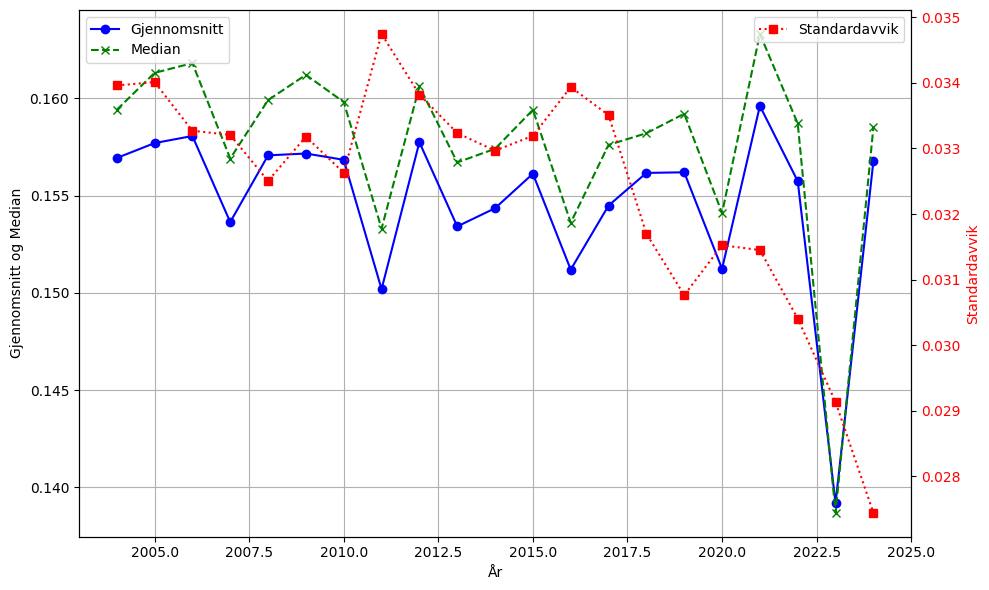

In [ ]:
import matplotlib.pyplot as plt

# Lager et plot med 2 y-akser
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotter gjennomsnitt og median p√• venstre akse
ax1.plot(√•rstall_liste, gjennomsnitt_liste, marker='o', linestyle='-', label='Gjennomsnitt', color='blue')
ax1.plot(√•rstall_liste, median_liste, marker='x', linestyle='--', label='Median', color='green')

# Legger til tittel og etiketter for venstre akse
ax1.set_xlabel("√Ör")
ax1.set_ylabel("Gjennomsnitt og Median", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Legger til rutenett
ax1.grid(True)

# Lager en annen y-akse for standardavvik
ax2 = ax1.twinx()  # Oppretter en andre y-akse
ax2.plot(√•rstall_liste, standardavvik_liste, marker='s', linestyle=':', label='Standardavvik', color='red')

# Legger til etikett for h√∏yre akse
ax2.set_ylabel("Standardavvik", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legger til legende
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Justerer layout for √• unng√• overlappende etiketter
plt.tight_layout()

plt.show()


### Kode 2
I kode 1 synker ikke grafen som vi antok. 

Vi tar derfor √• visualiser data_m-lavfeilmargin i 2004 for √• finne ut hva som skjer


### Kommentar
Denne koden visualiserer albedo-data for 2004 som et varmekart, hvor h√∏yere albedo-verdier vises med lysere farger. Kartet kombinerer disse verdiene med r√∏de prikker som markerer geografiske punkter med lav m√•lefeil, noe som indikerer h√∏y datakvalitet. Resultatet gir et raskt og visuelt inntrykk av hvor p√•litelige og sn√∏dekte omr√•der befinner seg

Vi ser at data med lavfeilmargin ikke befinner seg i h√∏yden med is og sn√∏. Is og sn√∏ har generellt sett over 0.3 i albedo og er i visualiseringen farget gult. Vi ser at det er overvekt med st√∏y i datasettet og vi gjennomf√∏rer kode 1 med et mere filtrert datasett ved √• kun se p√• omr√•der med sn√∏ og is. Dette kalles Signal-to-Noise ratio (SNR) siden data settet inneholder en alt for stor overvekt av st√∏y i forhold til signalet.

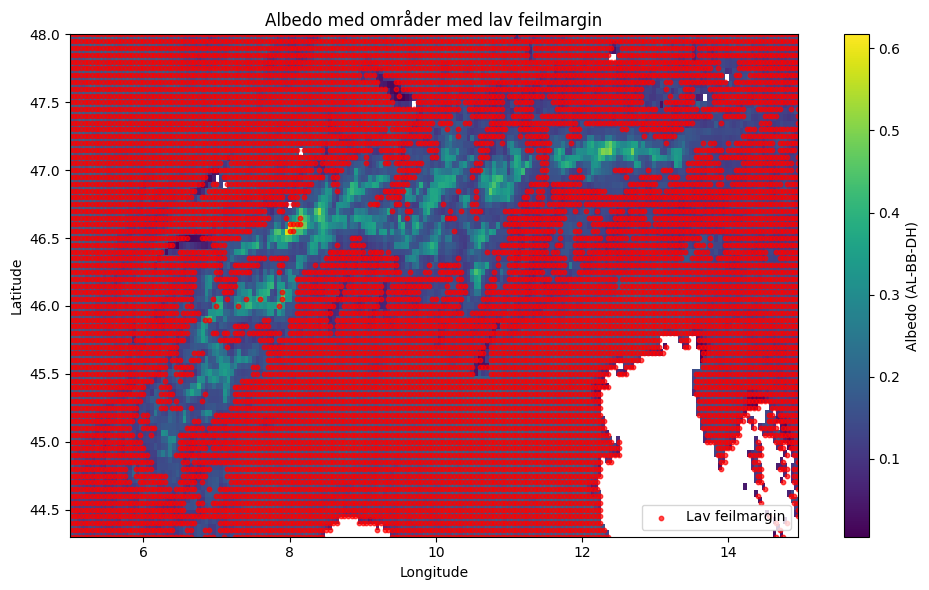

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filstier
hovedfil      = "../data/csv_albedo_effekt/Albedo effekt 2004.csv"
feilmarginfil = "../data/csv_albedo_effekt/data_m-lavfeilmargin.csv"

# Les inn data
df_main  = pd.read_csv(hovedfil)
df_error = pd.read_csv(feilmarginfil)

# Runder koordinater
df_main["lat"]   = df_main["lat"]
df_main["lon"]   = df_main["lon"]
df_error["lat"]  = df_error["lat"]
df_error["lon"]  = df_error["lon"]

# Unike, sorterte koordinater stigende
lat_vals = np.sort(df_main["lat"].unique())   # fra s√∏r til nord
lon_vals = np.sort(df_main["lon"].unique())   # fra vest til √∏st

# Lag 2D-grid for albedo
albedo_grid = (
    df_main
    .pivot(index="lat", columns="lon", values="AL-BB-DH")
    .reindex(index=lat_vals, columns=lon_vals)
)

# Koordinatgrenser
lon_min, lon_max = lon_vals.min(), lon_vals.max()
lat_min, lat_max = lat_vals.min(), lat_vals.max()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Heatmap med riktig orientering
im = ax.imshow(
    albedo_grid,
    cmap="viridis",
    extent=[lon_min, lon_max, lat_min, lat_max],
    origin="lower",       # viktig for at laveste latitude nederst
    aspect="auto"
)
plt.colorbar(im, ax=ax, label="Albedo (AL-BB-DH)")

# R√∏de prikker for lav‚Äëfeilmargin
ax.scatter(
    df_error["lon"],
    df_error["lat"],
    color='Red',
    s=10,
    label="Lav feilmargin",
    alpha=0.7
)

ax.set_title("Albedo med omr√•der med lav feilmargin")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()

### Kode 3
Vi gjennomf√∏rer kode 1 med et mere filtrert datasett ved √• kun se p√• omr√•der med sn√∏ og is(>0.3 albedo) 

Vi bruker fill between for √• inkludere standard avviket i koden.
Omr√•dene er ikke n√∏dvendigvis like i alle statistiske m√•ligene p√• grunn av begrensningen >0.3  (3.2*)

### Kommentar

Gjennomsnittet varierer mellom 0.46 og 0.38. Utenom 2013 som kan tyde p√• en feilkildet dette √•ret med verdien 0.53. Denne feilkilden kan komme av unormale mengder sn√∏, temperatur varisjon eller tekninsk m√•lefeil.
Medianen f√∏lger gjennomsnittet tett som tyder p√• at dataen er symmetrisk fordelt
Standardavviket holder seg konsistent med en dyp mot 2023. Men er s√•pass lav at gjennomsnittet gir et godt bildet av virkligheten.

Hypotensen at SNR var for h√∏yt og signalet ble dempet var riktig. N√• ser vi en degresjon som vi antok.


üìä Resultatmatrise:
[√Ör, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.4654    0.4521    0.0754]
 [2005.        0.4282    0.417     0.0703]
 [2006.        0.4302    0.4243    0.0742]
 [2007.        0.4667    0.4575    0.0594]
 [2008.        0.4528    0.4388    0.0547]
 [2009.        0.4546    0.4603    0.0624]
 [2010.        0.4234    0.4111    0.0551]
 [2011.        0.402     0.3825    0.0591]
 [2012.        0.4506    0.4444    0.056 ]
 [2013.        0.5235    0.5124    0.0749]
 [2014.        0.4556    0.4661    0.0616]
 [2015.        0.4186    0.4007    0.0662]
 [2016.        0.4675    0.4537    0.0551]
 [2017.        0.4002    0.3955    0.0598]
 [2018.        0.4126    0.3952    0.0724]
 [2019.        0.414     0.4007    0.0799]
 [2020.        0.4022    0.3963    0.0799]
 [2021.        0.426     0.4221    0.0939]
 [2022.        0.3822    0.372     0.0592]
 [2023.        0.3782    0.3664    0.0658]
 [2024.        0.4423    0.4428    0.0852]]


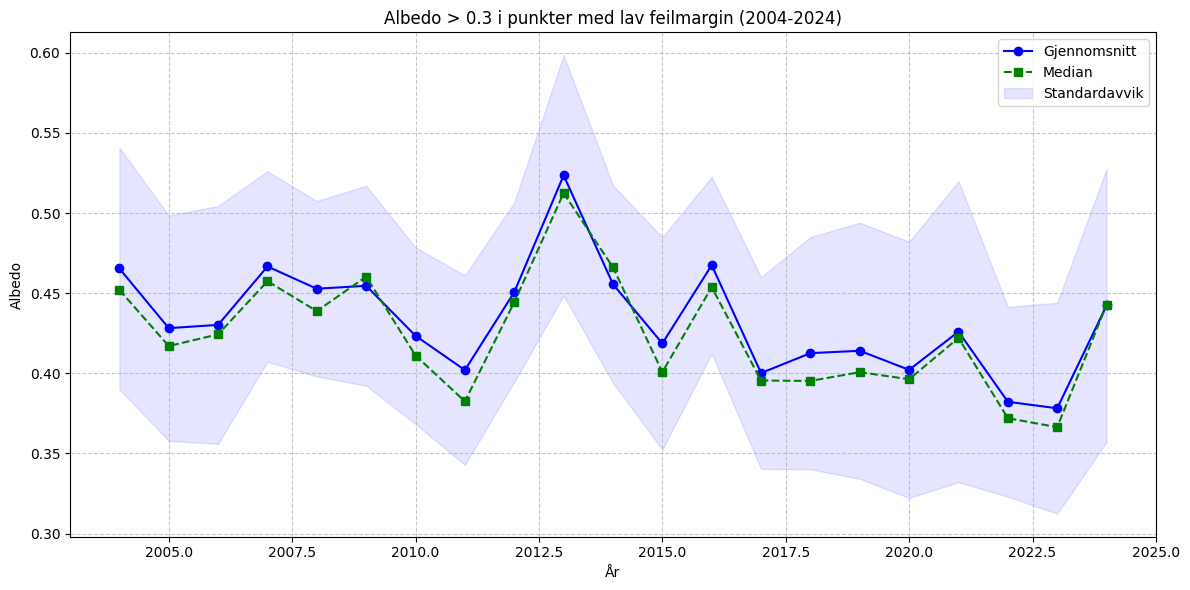

In [9]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# 1. Last inn referansefil med pre-filtrerte punkter (lav feilmargin)
referanse_df = pd.read_csv("../data/csv_albedo_effekt/data_m-lavfeilmargin.csv")
referanse_df["lat"] = referanse_df["lat"]
referanse_df["lon"] = referanse_df["lon"]

# 2. Hent alle albedo-filer
datafiler = sorted(glob.glob("../data/csv_albedo_effekt/Albedo*.csv"))

# 3. Initialiser lister for lagring
√•rstall_liste = []
gjennomsnitt_liste = []
median_liste = []
std_liste = []

# 4. Analyser hvert √•r
for fil in datafiler:
    # Last inn √•rsdata
    df = pd.read_csv(fil)
    
    # Sl√• sammen med referansepunkter (som allerede har lav feilmargin)
    felles = pd.merge(referanse_df[["lat", "lon"]], df, on=["lat", "lon"], how="inner")
    
    # Filtrer for albedo > 0.3
    if "AL-BB-DH" in felles.columns:
        filtrert = felles[felles["AL-BB-DH"] > 0.3]
        
        # Beregn statistikk
        if not filtrert.empty:
            gjennomsnitt = filtrert["AL-BB-DH"].mean()
            median = filtrert["AL-BB-DH"].median()
            std = filtrert["AL-BB-DH"].std()
        else:
            gjennomsnitt = median = std = np.nan
    else:
        gjennomsnitt = median = std = np.nan
    
    # Hent √•rstall
    √•rstall = int(''.join(filter(str.isdigit, os.path.basename(fil))))
    
    # Lagre resultater
    √•rstall_liste.append(√•rstall)
    gjennomsnitt_liste.append(gjennomsnitt)
    median_liste.append(median)
    std_liste.append(std)
    

# Sorter etter √•r
sortert_indeks = np.argsort(√•rstall_liste)
√•rstall = np.array(√•rstall_liste)[sortert_indeks]
gjennomsnitt = np.array(gjennomsnitt_liste)[sortert_indeks]
median = np.array(median_liste)[sortert_indeks]
std = np.array(std_liste)[sortert_indeks]

# Albedo Matrise
albedo_matrise = np.column_stack((√•rstall, gjennomsnitt, median, std))
print("\nüìä Resultatmatrise:")
print("[√Ör, Gjennomsnitt, Median, Standardavvik]")
np.set_printoptions(suppress=True, precision=4)
print(albedo_matrise)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(√•rstall, gjennomsnitt, 'o-', label='Gjennomsnitt', color='blue')
plt.plot(√•rstall, median, 's--', label='Median', color='green')
plt.fill_between(√•rstall, 
                gjennomsnitt - std, 
                gjennomsnitt + std, 
                color='blue', alpha=0.1, label='Standardavvik')

plt.title("Albedo > 0.3 i punkter med lav feilmargin (2004-2024)")
plt.xlabel("√Ör")
plt.ylabel("Albedo")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Kode 3.2

Denne koden fastsetter punktene funnet i 2004 og ser p√• endringen i sn√∏ p√• disse omr√•dene (3*)

Ved √• bruke en fast kontrollgruppe er det vanskligere √• f√• feilkilder.

Vi bruker fill between for √• inkludere standard avviket i koden.


### Kommentar
Gjennomsnittet varierer mellom 0.46 og 0.38. Utenom 2013 som kan tyde p√• en feilkildet dette √•ret med verdien 0.53. Denne feilkilden kan komme av unormale mengder sn√∏, temperatur varisjon eller tekninsk m√•lefeil.
Medianen f√∏lger gjennomsnittet tett som tyder p√• at dataen er symmetrisk fordelt
Standardavviket holder seg konsistent med en dyp mot 2023. Men er s√•pass lav at gjennomsnittet gir et godt bildet av virkligheten.

Hypotensen at SNR var for h√∏yt og signalet ble dempet var riktig. N√• ser vi en degresjon som vi antok.

De 2 kodene er sv√¶rt like men ikke helt.

üîç Antall referansepunkter: 16
Gjennomsnittlig forskjell mellom median og gjennomsnitt 0.00861726190476191

üìä Statistikkmatrise for faste sn√∏punkter:
[√Ör, Gjennomsnitt, Median, Standardavvik]
[[2004.        0.4654    0.4521    0.0754]
 [2005.        0.4194    0.4055    0.0765]
 [2006.        0.4302    0.4243    0.0742]
 [2007.        0.4667    0.4575    0.0594]
 [2008.        0.4431    0.4387    0.0654]
 [2009.        0.4546    0.4603    0.0624]
 [2010.        0.4234    0.4111    0.0551]
 [2011.        0.3938    0.3773    0.066 ]
 [2012.        0.4506    0.4444    0.056 ]
 [2013.        0.535     0.5238    0.0598]
 [2014.        0.4556    0.4661    0.0616]
 [2015.        0.4186    0.4007    0.0662]
 [2016.        0.4675    0.4537    0.0551]
 [2017.        0.3931    0.3898    0.0644]
 [2018.        0.3976    0.3935    0.0788]
 [2019.        0.414     0.4007    0.0799]
 [2020.        0.4022    0.3963    0.0799]
 [2021.        0.426     0.4221    0.0939]
 [2022.        0.3459    0.

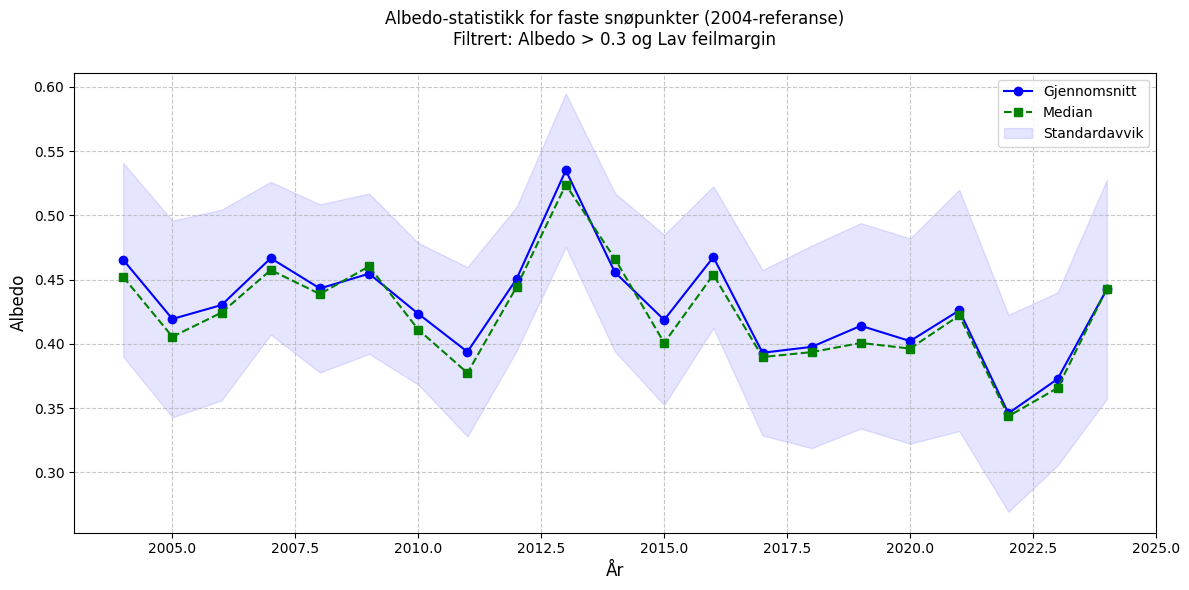

In [8]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# Henter lav feilmargin fil og referansefil
referanse_2004 = pd.read_csv("../data/csv_albedo_effekt/Albedo effekt 2004.csv")
feilmargin = pd.read_csv("../data/csv_albedo_effekt/data_m-lavfeilmargin.csv")


# Merge og filtrer for referansepunkter (h√∏y albedo >0.3, lav feilmargin)
felles_2004 = pd.merge(referanse_2004, feilmargin, on=["lat", "lon"], how="inner")
referanse_punkter = felles_2004[(felles_2004["AL-BB-DH"] > 0.3)][["lat", "lon"]]
print(f"üîç Antall referansepunkter: {len(referanse_punkter)}")

# Hent filer fo alle √•r
datafiler = sorted(glob.glob("../data/csv_albedo_effekt/Albedo*.csv"))

# Initialiser lister for statistikk
√•rstall_liste = []
gjennomsnitt_liste = []
median_liste = []
std_liste = []

# Analyser hvert √•r basert p√• faste 2004-punkter
for fil in datafiler:
    df = pd.read_csv(fil)
    
    # Finn felles punkter med referanse√•ret
    felles = pd.merge(referanse_punkter, df, on=["lat", "lon"], how="inner")
    
    if not felles.empty and "AL-BB-DH" in felles.columns:
        # Beregn statistikk for de faste punktene
        gjennomsnitt = felles["AL-BB-DH"].mean()
        median = felles["AL-BB-DH"].median()
        std = felles["AL-BB-DH"].std()
    else:
        gjennomsnitt = median = std = np.nan
    
    # Hent √•rstall fra filnavn
    √•rstall = int(''.join(filter(str.isdigit, os.path.basename(fil))))
    
    # Lagre resultater
    √•rstall_liste.append(√•rstall)
    gjennomsnitt_liste.append(gjennomsnitt)
    median_liste.append(median)
    std_liste.append(std)
    

# Sorterer data etter √•rstall
sortert_indeks = np.argsort(√•rstall_liste)
√•rstall = np.array(√•rstall_liste)[sortert_indeks]
gjennomsnitt = np.array(gjennomsnitt_liste)[sortert_indeks]
median = np.array(median_liste)[sortert_indeks]
std = np.array(std_liste)[sortert_indeks]

# Matrise med resultater
albedo_matrise = np.column_stack((√•rstall, gjennomsnitt, median, std))
print(f"Gjennomsnittlig forskjell mellom median og gjennomsnitt {np.mean(np.abs(albedo_matrise[:,1] - albedo_matrise[:,2]))}")  
print("\nüìä Statistikkmatrise for faste sn√∏punkter:")
print("[√Ör, Gjennomsnitt, Median, Standardavvik]")
np.set_printoptions(suppress=True, precision=4)
print(albedo_matrise)

# Plotting med standardavvik som fylt omr√•de
plt.figure(figsize=(12, 6))

# Plot med gjennomsnitt og median
plt.plot(√•rstall, gjennomsnitt, 'o-', label='Gjennomsnitt', color='blue')
plt.plot(√•rstall, median, 's--', label='Median', color='green')

# Legger til standardavvik som fylt omr√•de
plt.fill_between(√•rstall, 
                gjennomsnitt - std, 
                gjennomsnitt + std, 
                color='blue', alpha=0.1, label='Standardavvik')

# Konfigurer plot
plt.title("Albedo-statistikk for faste sn√∏punkter (2004-referanse)\n"
          "Filtrert: Albedo > 0.3 og Lav feilmargin", pad=20)
plt.xlabel("√Ör", fontsize=12)
plt.ylabel("Albedo", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Kode 4

Koden bruker scipy og regner ut korrelasjon og p verdi.
Korrelasjonen er styrken og retningen og varrierer hendholdvis fra -1 til 1. Postiv betyr den √∏ker og jo n√¶rmere 0 jo mindre er styrken.
P verdi sier om korrelasjonen er statistisk signifikant. (<0.05)

### Kommentar
"r = -0.4494, p-verdi = 0.0410"
Koden har en moderat negativ korrelasjon og er 95% sikker p√• at korrelasjonen ikke skylder tilfeldigheter. Desto flere √•r de m√•ler i fremtiden desto mer n√∏yaktig vil korrelajonen v√¶re, hvis temperaturen forsetter √• √∏ke.

In [51]:
from scipy.stats import pearsonr

# Fjern eventuelle NaN-verdier f√∏r korrelasjonsberegning
x = np.array(albedo_matrise[:,0])
y = np.array(albedo_matrise[:,1])
mask = ~np.isnan(y)
x = x[mask]
y = y[mask]

# Pearson korrelasjon
r, p = pearsonr(x, y)
print(f" Pearson korrelasjon mellom √•r og albedo: \n r = {r:.4f}, p-verdi = {p:.4f}")

 Pearson korrelasjon mellom √•r og albedo: 
 r = -0.4494, p-verdi = 0.0410
